## Notes on Architecting Solutions on AWS

### notes on serverless solution of product ordering system

* the architecture diagram is the following:

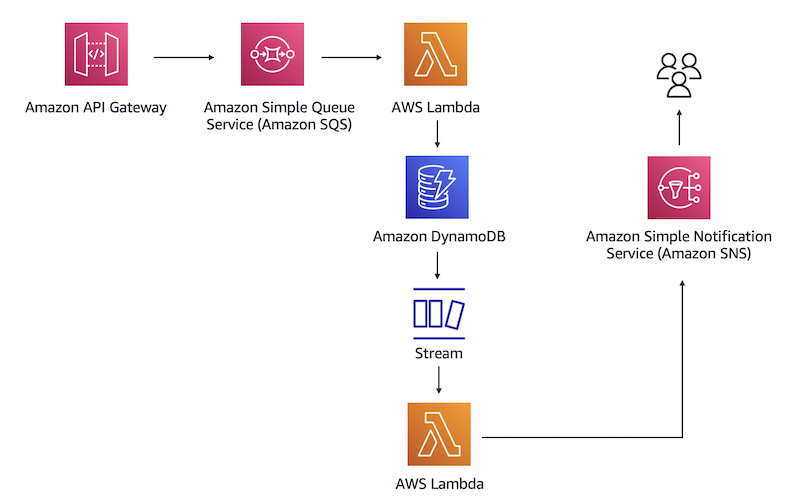

Key considerations of the design:


### Data analytics solution to ingest, process and visualize data
* business: create online menu using QR codes
* requirements
  + Provide HTTPS endpoint for data collection
    + the data were generated by the customer implemented javascript library, so no need for data transformation
  + have cross region data replication and encryption
  + encryption for at-rest and in-tranisit data
  + use managed services for convenience to reduce staff
  + charged per refined usage rather than time
* aws data analytics services
  + https://aws.amazon.com/big-data/datalakes-and-analytics  

#### Storage options
* EBS
  + has to be attached to an EC2 instance
  + no granular in terms of volume (if you reserved a 50G volume, you pay for it even if you only used 5 kb)
  + durability standard is now as high as S3 (S3 duplicates across multiple AZs in the region)
* EFS
  + can replicate data across AWS regions
  + rely on file systems attached to resources, such as EC2, containers, or servers  
* S3
  + storage for internet
  + access by API calls such as PutObject, GetObject, DeleteObject etc. from everywhere
  + ideal for separating storage from data processing, which is important for data analytics or big data operations
    + allows to use different data ingestion and processing services (that is why S3 is used in data lake)
    + you don't need an instance or servier to operate it
  + many AWS services have already known how to work with s3
  + data stored in a durable way with cross-region replication and encryption
  + charged by refined usage
  + encryption of data in-transit and at-rest for free
* public access of S3 as a static website
  + need to disable the 'block all public access' at both account and bucket levels
  + in property of the bucket, click 'static website hosting' and define index and error webpages
  + set bucket policy to allow everyone to access s3:GetBOject and s3:GetObjectVersion actions for all resources in the bucket
  + finally, go to the 'static website hosting' property, and copy the bucket url